In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import itertools

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

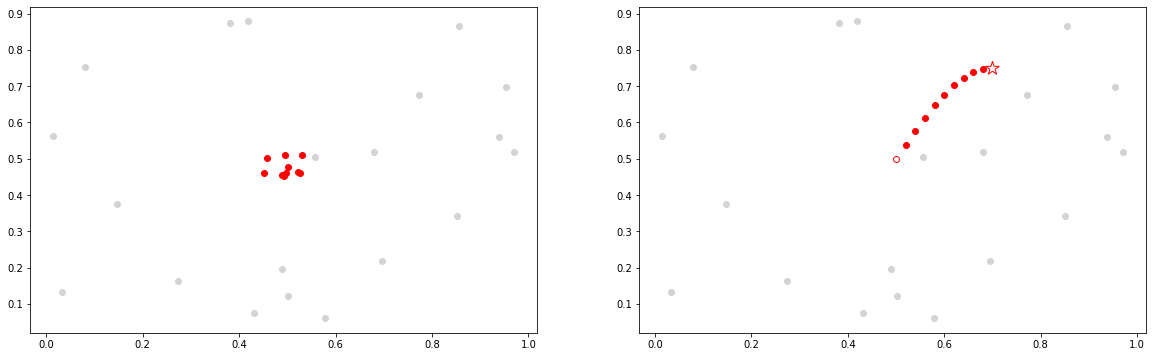

In [2]:
x = np.random.rand(20)
y = np.random.rand(20)
n = 10
motifs_x = 0.5 * np.ones(n) + np.random.uniform(-0.05, 0.05, n)
motifs_y = 0.5 * np.ones(n) + np.random.uniform(-0.05, 0.05, n)
sin_x = np.linspace(0, np.pi/2, n+1)
sin_y = np.sin(sin_x)/4
chains_x = 0.5 * np.ones(n+1) + 0.02 * np.arange(n+1)
chains_y = 0.5 * np.ones(n+1) + sin_y
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(x, y, color='lightgrey')
axes[0].scatter(motifs_x, motifs_y, color='red')
axes[1].scatter(x, y, color='lightgrey')
axes[1].scatter(chains_x[0], chains_y[0], edgecolor='red', color='white')
axes[1].scatter(chains_x[1:n], chains_y[1:n], color='red')
axes[1].scatter(chains_x[n], chains_y[n], edgecolor='red', color='white', marker='*', s=200)
plt.show()

<ipython-input-3-3ff67988918d>:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(xs, ys, "-o", markerfacecolor="None", markeredgecolor="None", linestyle="None")


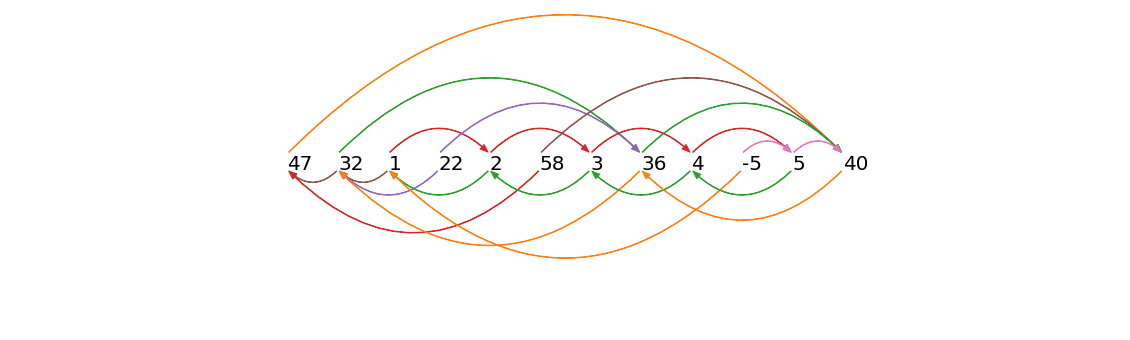

In [3]:
nearest_neighbors = np.array([[1,  47, np.nan,     12],
                              [2,  32,      1,      8],
                              [3,   1,      2,      5],
                              [4,  22,      2,      8],
                              [5,   2,      3,      7],
                              [6,  58,      1,     12],
                              [7,   3,      5,      9],
                              [8,  36,      2,     12],
                              [9,   4,      7,     11],
                              [10, -5,      3,     11],
                              [11,  5,      9,     12],
                              [12, 40,      8, np.nan]])

colors = [['C1', 'C1'],
          ['C2', 'C5'],
          ['C3', 'C5'],
          ['C4', 'C4'],
          ['C3', 'C2'],
          ['C5', 'C3'],
          ['C3', 'C2'],
          ['C2', 'C1'],
          ['C3', 'C2'],
          ['C6', 'C1'],
          ['C6', 'C2'],
          ['C1', 'C1']]

style="Simple, tail_width=0.5, head_width=6, head_length=8"
kw = dict(arrowstyle=style, connectionstyle="arc3, rad=-.5",)

xs = np.arange(nearest_neighbors.shape[0]) + 1
ys = np.zeros(nearest_neighbors.shape[0])
plt.plot(xs, ys, "-o", markerfacecolor="None", markeredgecolor="None", linestyle="None")

x0, x1, y0, y1 = plt.axis()
plot_margin = 5.0
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))
plt.axis('off')

for x, y, nearest_neighbor, color in zip(xs, ys, nearest_neighbors, colors):
    plt.text(x, y, str(int(nearest_neighbor[1])), color="black", fontsize=20)

    # Plot right matrix profile indices
    if not np.isnan(nearest_neighbor[3]):
        arrow = FancyArrowPatch((x, 0.5), (nearest_neighbor[3], 0.5), color=color[0], **kw)
        plt.gca().add_patch(arrow)

    # Plot left matrix profile indices
    if not np.isnan(nearest_neighbor[2]):
        arrow = FancyArrowPatch((x, 0.0), (nearest_neighbor[2], 0.0), color=color[1], **kw)
        plt.gca().add_patch(arrow)

plt.show()

<ipython-input-4-0ecc42cac573>:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(xs, ys, "-o", markerfacecolor="None", markeredgecolor="None", linestyle="None")


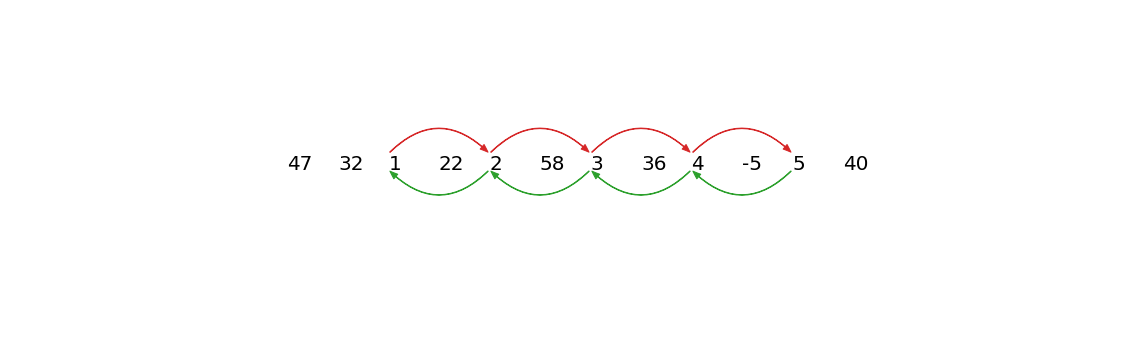

In [4]:
nearest_neighbors = np.array([[1,  47, np.nan, np.nan],
                              [2,  32, np.nan, np.nan],
                              [3,   1, np.nan,      5],
                              [4,  22, np.nan, np.nan],
                              [5,   2,      3,      7],
                              [6,  58, np.nan, np.nan],
                              [7,   3,      5,      9],
                              [8,  36, np.nan, np.nan],
                              [9,   4,      7,     11],
                              [10, -5, np.nan, np.nan],
                              [11,  5,      9, np.nan],
                              [12, 40, np.nan, np.nan]])

colors = [['C1', 'C1'],
          ['C2', 'C5'],
          ['C3', 'C5'],
          ['C4', 'C4'],
          ['C3', 'C2'],
          ['C5', 'C3'],
          ['C3', 'C2'],
          ['C2', 'C1'],
          ['C3', 'C2'],
          ['C6', 'C1'],
          ['C6', 'C2'],
          ['C1', 'C1']]

style="Simple, tail_width=0.5, head_width=6, head_length=8"
kw = dict(arrowstyle=style, connectionstyle="arc3, rad=-.5",)

xs = np.arange(nearest_neighbors.shape[0]) + 1
ys = np.zeros(nearest_neighbors.shape[0])
plt.plot(xs, ys, "-o", markerfacecolor="None", markeredgecolor="None", linestyle="None")

x0, x1, y0, y1 = plt.axis()
plot_margin = 5.0
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin))
plt.axis('off')

for x, y, nearest_neighbor, color in zip(xs, ys, nearest_neighbors, colors):
    plt.text(x, y, str(int(nearest_neighbor[1])), color="black", fontsize=20)

    # Plot right matrix profile indices
    if not np.isnan(nearest_neighbor[3]):
        arrow = FancyArrowPatch((x, 0.5), (nearest_neighbor[3], 0.5), color=color[0], **kw)
        plt.gca().add_patch(arrow)

    # Plot left matrix profile indices
    if not np.isnan(nearest_neighbor[2]):
        arrow = FancyArrowPatch((x, 0.0), (nearest_neighbor[2], 0.0), color=color[1], **kw)
        plt.gca().add_patch(arrow)

plt.show()

In [5]:
df = pd.read_csv("https://zenodo.org/record/4276348/files/Time_Series_Chains_Kohls_data.csv?download=1")
df.head()

,volume
0,0.010417
1,0.010417
2,0.010417
3,0.000000
4,0.000000


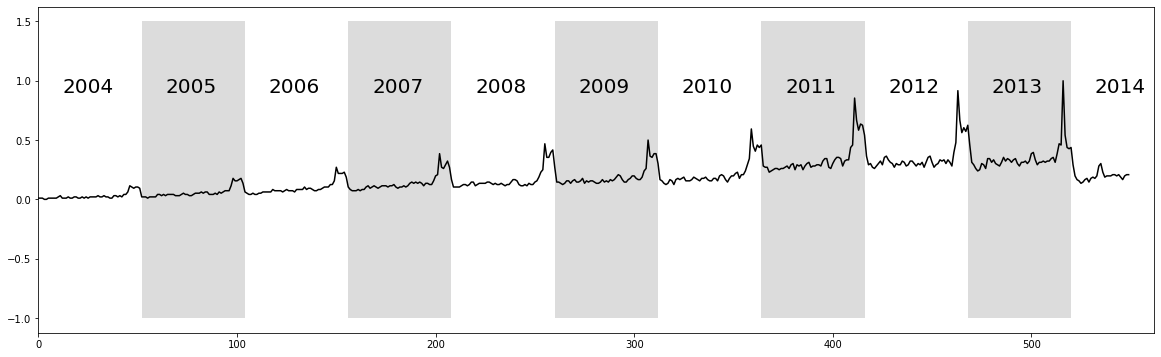

In [6]:
plt.plot(df['volume'], color='black')
plt.xlim(0, df.shape[0]+12)
color = itertools.cycle(['white', 'gainsboro'])
for i, x in enumerate(range(0, df.shape[0], 52)):
    plt.text(x+12, 0.9, str(2004+i), color="black", fontsize=20)
    rect = Rectangle((x, -1), 52, 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)
plt.show()

In [8]:
m = 20
mp = stumpy.stump(df['volume'], m=m)
print(mp)

[[3.3292647463977265 490 -1 490]
 [3.079097519492505 209 -1 209]
 [2.90464687851744 210 -1 210]
 ...
 [2.7887386229576823 420 420 -1]
 [2.8330309559501003 421 421 -1]
 [3.1036500711992585 422 422 -1]]


In [9]:
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])

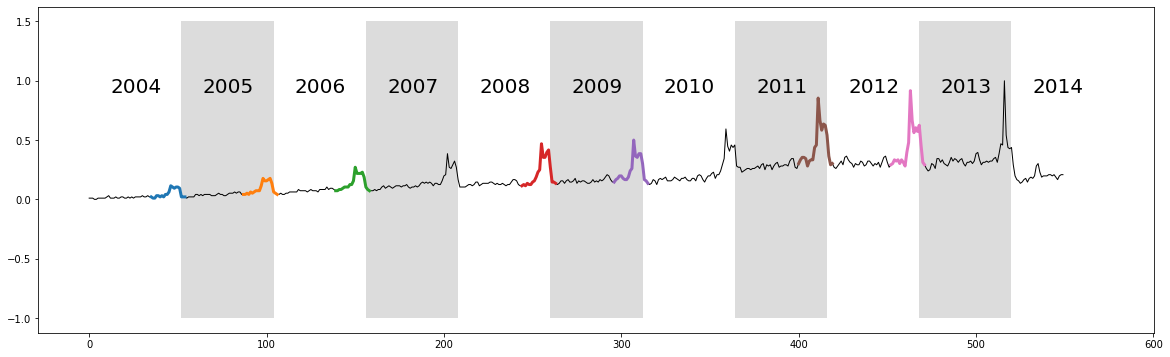

In [10]:
plt.plot(df['volume'], linewidth=1, color='black')
for i in range(unanchored_chain.shape[0]):
    y = df['volume'].iloc[unanchored_chain[i]:unanchored_chain[i]+m]
    x = y.index.values
    plt.plot(x, y, linewidth=3)
color = itertools.cycle(['white', 'gainsboro'])
for i, x in enumerate(range(0, df.shape[0], 52)):
    plt.text(x+12, 0.9, str(2004+i), color="black", fontsize=20)
    rect = Rectangle((x, -1), 52, 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)

plt.show()